In [42]:
import pandas as pd
import NeuralNetwork as NN
import numpy as np

In [43]:
train = pd.read_csv('mnist_train.csv', header=None)
test = pd.read_csv('mnist_test.csv', header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
train_labels = train[0]
train_data = train.drop(columns=0)
test_labels = test[0]
test_data = test.drop(columns=0)
train_labels

KeyboardInterrupt: 

In [ ]:
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0
train_data_norm.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000786,0.000348,0.000179,0.000076,0.000059,0.000008,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023696,0.015514,0.011137,0.006615,0.006582,0.001359,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


Accuracy: 81.82%
Accuracy: 82.93%
Accuracy: 84.49%
Accuracy: 83.90%
Accuracy: 86.09%


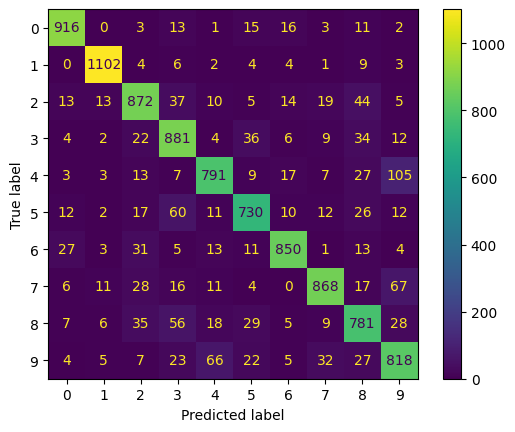

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

layers = [128, 64]
network = NN.NeuralNetwork(784, layers, 10, NN.Activation.TANH)

for _ in range(5):
    for ex in np.random.permutation(len(train_data)):
        img = train_data.iloc[ex]
        label = train_labels.iloc[ex]
        label_onehot = [-1 for _ in range(10)]
        label_onehot[label] = 1
        network.train(img, label_onehot)
    correct = 0
    result = [[], []]
    wrong = []
    for t in range(len(test_data)):
        img = test_data.iloc[t]
        label = test_labels.iloc[t]
        pred = network.predict(img)
        pred_label = np.argmax(pred)
        result[0].append(label)
        result[1].append(pred_label)
        if label == pred_label:
            correct += 1
        else:
            wrong.append(img)
    print(f'Accuracy: {correct*100/(t+1):.2f}%')
matrix = ConfusionMatrixDisplay.from_predictions(result[0], result[1])
plt.show()

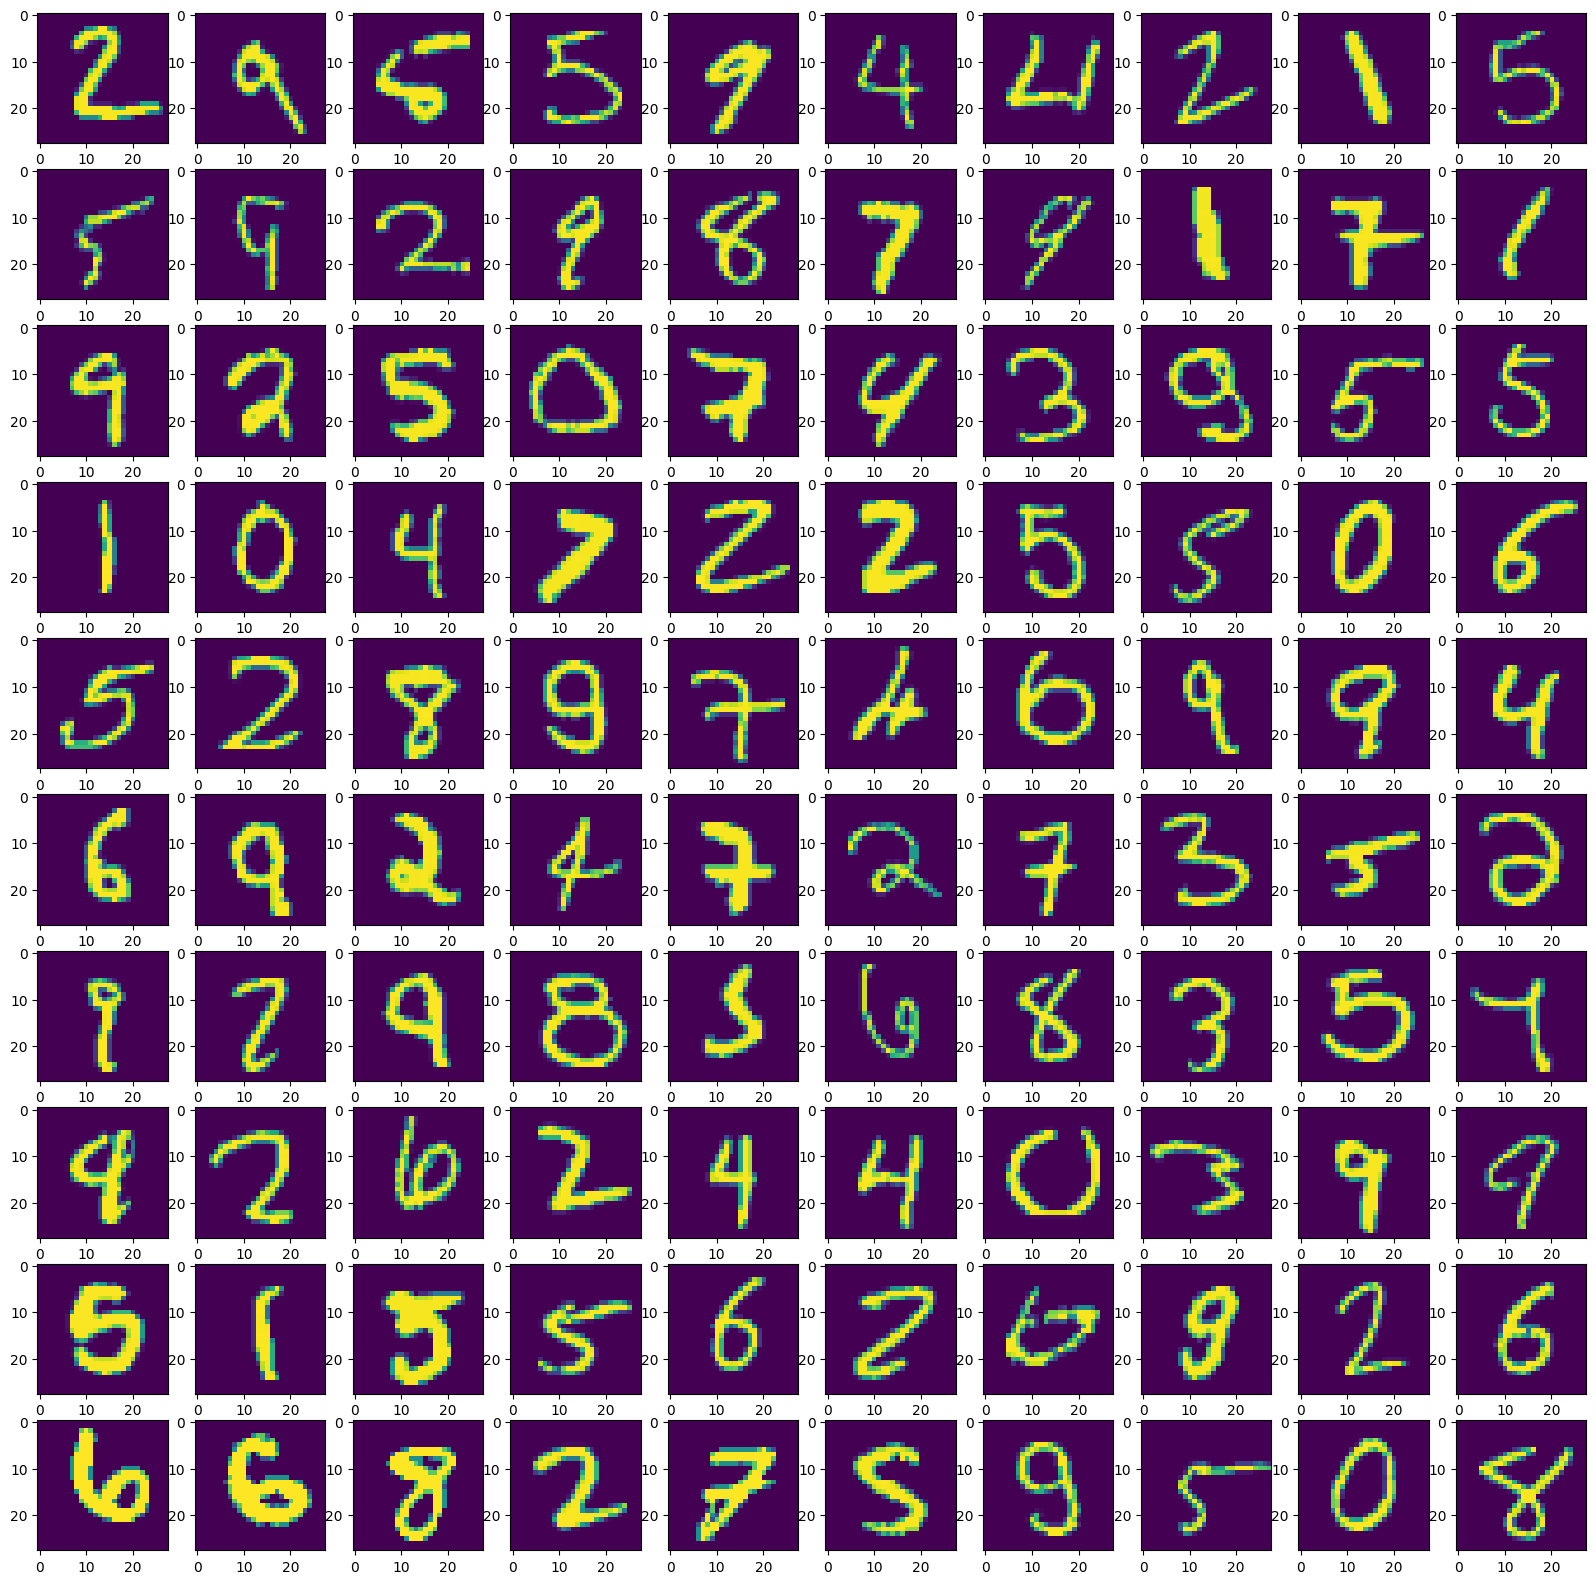

In [ ]:
# fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(8, 8))
cols = 10
rows = len(wrong[:100])//cols + 1
fig = plt.figure(figsize=(2*cols, 2*rows))
fig.tight_layout()
for i, img in enumerate(wrong[:100]):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(np.array(img).reshape((28, 28)))
plt.show()